### Importing necessary libraries

In [275]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
#from sklearn.pandas import CategoricalImputer
from feature_engine.imputation import CategoricalImputer

import numpy as np
import random
from matplotlib import pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

### Loading and visualizing the data

In [276]:
data = pd.read_csv('survey.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [277]:
#Analyzing timestamp column
data['Timestamp']

0       2014-08-27 11:29:31
1       2014-08-27 11:29:37
2       2014-08-27 11:29:44
3       2014-08-27 11:29:46
4       2014-08-27 11:30:22
               ...         
1254    2015-09-12 11:17:21
1255    2015-09-26 01:07:35
1256    2015-11-07 12:36:58
1257    2015-11-30 21:25:06
1258    2016-02-01 23:04:31
Name: Timestamp, Length: 1259, dtype: object

### Modifying the timestamp to only keep the year

In [278]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')
data['Timestamp'] = data['Timestamp'].dt.year
data['Timestamp'].unique()

array([2014, 2015, 2016], dtype=int64)

In [279]:
### Looking at the age column distribution

In [280]:
data['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72], dtype=int64)

### Keeping the age column within a range 

In [281]:
irr_age = data[(data['Age'] < 12) | (data['Age'] > 100)]
data['Age'] = data['Age'].drop(irr_age.index)
data['Age']
data['Age'].unique()

array([37., 44., 32., 31., 33., 35., 39., 42., 23., 29., 36., 27., 46.,
       41., 34., 30., 40., 38., 50., 24., 18., 28., 26., 22., 19., 25.,
       45., 21., nan, 43., 56., 60., 54., 55., 48., 20., 57., 58., 47.,
       62., 51., 65., 49., 53., 61., 72.])

### Looking at the Gender column distribution

In [282]:
data['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

### Keeping the Gender column within acceptable values

In [283]:
male = ['male', 'Male','M', 'm', 'Male-ish', 'maile','Cis Male','Mal', 'Male (CIS)','Make','Male ', 'Man',
        'msle','cis male', 'Cis Man','Malr','Mail']
female = ['Female', 'female','Cis Female', 'F','f','Femake', 'woman','Female ','cis-female/femme','Female (cis)','femail','Woman','female']
trans = ['Trans-female','something kinda male?','queer/she/they','non-binary','All','fluid', 'Genderqueer','Androgyne', 'Agender','Guy (-ish) ^_^',
        'male leaning androgynous','Trans woman','Neuter', 'Female (trans)','queer','ostensibly male, unsure what that really means','trans']
other = ['Nah', 'Enby', 'A little about you','p']

data['Gender'].replace(to_replace=male, value='male',inplace=True)
data['Gender'].replace(to_replace=female, value='female',inplace=True)
data['Gender'].replace(to_replace=trans, value='trans',inplace=True)
data['Gender'].replace(to_replace=other, value='other',inplace=True)

print(data['Gender'].unique())

['female' 'male' 'trans' 'other']


### Looking at the Country column distribution

In [284]:
data['Country'].unique()

array(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
       'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
       'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand',
       'Zimbabwe', 'Spain', 'Finland', 'Uruguay', 'Israel',
       'Bosnia and Herzegovina', 'Hungary', 'Singapore', 'Japan',
       'Nigeria', 'Croatia', 'Norway', 'Thailand', 'Denmark',
       'Bahamas, The', 'Greece', 'Moldova', 'Georgia', 'China',
       'Czech Republic', 'Philippines'], dtype=object)

### Categorising different countries on the basis of continents

In [285]:
NorthAmerica = ['United States', 'Canada','Bahamas','Mexico', 'Costa Rica', 'Bahamas, The']
Europe = ['United Kingdom','Bulgaria','France','Portugal','Netherlands','Switzerland', 'Poland','Germany', 'Russia',
        'Austria','Ireland','Italy', 'Sweden','Latvia','Romania', 'Belgium','Slovenia','Spain','Bosnia and Herzegovina',
         'Hungary','Croatia','Norway', 'Denmark', 'Greece', 'Moldova', 'Georgia', 'Czech Republic', 'Finland']
SouthAmerica = ['Brazil','Colombia','Uruguay']
Africa = ['South Africa','Zimbabwe','Nigeria']
Australia = ['New Zealand']
Asia = ['India','Israel','Singapore','Japan','Thailand', 'China', 'Philippines']

data['Country'].replace(to_replace=Asia, value='Asia',inplace=True)
data['Country'].replace(to_replace=Australia, value='Australia',inplace=True)
data['Country'].replace(to_replace=Africa, value='Africa',inplace=True)
data['Country'].replace(to_replace=SouthAmerica, value='SouthAmerica',inplace=True)
data['Country'].replace(to_replace=Europe, value='Europe',inplace=True)
data['Country'].replace(to_replace=NorthAmerica, value='NorthAmerica',inplace=True)

data['Country'].unique()

array(['NorthAmerica', 'Europe', 'Australia', 'SouthAmerica', 'Asia',
       'Africa'], dtype=object)

### Looking at the State column distribution

In [286]:
data['state'].unique()

array(['IL', 'IN', nan, 'TX', 'TN', 'MI', 'OH', 'CA', 'CT', 'MD', 'NY',
       'NC', 'MA', 'IA', 'PA', 'WA', 'WI', 'UT', 'NM', 'OR', 'FL', 'MN',
       'MO', 'AZ', 'CO', 'GA', 'DC', 'NE', 'WV', 'OK', 'KS', 'VA', 'NH',
       'KY', 'AL', 'NV', 'NJ', 'SC', 'VT', 'SD', 'ID', 'MS', 'RI', 'WY',
       'LA', 'ME'], dtype=object)

### Dividing different states on the basis of US and NonUS States

In [287]:
USStates = ['IL', 'IN', 'TX', 'TN', 'MI', 'OH', 'CA', 'CT', 'MD', 'NY',
       'NC', 'MA', 'IA', 'PA', 'WA', 'WI', 'UT', 'NM', 'OR', 'FL', 'MN',
       'MO', 'AZ', 'CO', 'GA', 'DC', 'NE', 'WV', 'OK', 'KS', 'VA', 'NH',
       'KY', 'AL', 'NV', 'NJ', 'SC', 'VT', 'SD', 'ID', 'MS', 'RI', 'WY',
       'LA', 'ME']

data['state'].replace(to_replace=USStates, value='USStates',inplace=True)

data['state'] = data['state'].fillna('NonUSStates')

data['state'].unique()

array(['USStates', 'NonUSStates'], dtype=object)

### Checking the null values in the dataset

In [288]:
data.isnull().sum()

Timestamp                       0
Age                             8
Gender                          0
Country                         0
state                           0
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

### Filling out the missing values at Age, Self_Employed and Work_Interfere

In [289]:
data['Age'] = data['Age'].fillna(data['Age'].median())
data['work_interfere'].fillna(data['work_interfere'].mode()[0], inplace=True)
data['self_employed'].fillna(data['self_employed'].mode()[0], inplace=True)

### Removing the comments field from the dataset as it was optional in the survey

In [290]:
data.drop('comments', axis=1, inplace=True)
data.isnull().sum()

Timestamp                    0
Age                          0
Gender                       0
Country                      0
state                        0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

### Feature Scaling for the age column 

In [291]:
scaler = MinMaxScaler()
data['Age'] = scaler.fit_transform(data[['Age']])
data['Age']

0       0.351852
1       0.481481
2       0.259259
3       0.240741
4       0.240741
          ...   
1254    0.148148
1255    0.259259
1256    0.296296
1257    0.518519
1258    0.129630
Name: Age, Length: 1259, dtype: float64

### Feature Scaling for the timestamp column

In [292]:
scaler = MinMaxScaler()
data['Timestamp'] = scaler.fit_transform(data[['Timestamp']])
data['Timestamp']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1254    0.5
1255    0.5
1256    0.5
1257    0.5
1258    1.0
Name: Timestamp, Length: 1259, dtype: float64

### Categorical Encoding

In [293]:
for feature in data:
    if data[feature].dtype != 'object': continue
    encoder = LabelEncoder()
    data[feature] = encoder.fit_transform(data[feature])
data

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,0.0,0.351852,0,4,1,0,0,1,1,4,...,2,2,1,1,1,2,1,0,2,0
1,0.0,0.481481,1,4,1,0,0,0,2,5,...,0,0,0,1,0,0,1,1,0,0
2,0.0,0.259259,1,4,0,0,0,0,2,4,...,0,1,1,1,2,2,2,2,1,0
3,0.0,0.240741,1,3,0,0,1,1,1,2,...,1,1,2,2,1,0,0,0,1,1
4,0.0,0.240741,1,4,1,0,0,0,0,1,...,0,0,1,1,1,2,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,0.5,0.148148,1,3,0,0,0,1,3,2,...,0,2,1,1,1,1,1,1,0,0
1255,0.5,0.259259,1,4,1,0,1,1,1,2,...,2,1,1,1,1,2,1,1,2,0
1256,0.5,0.296296,1,4,1,0,1,1,3,5,...,0,1,2,2,0,0,1,1,1,0
1257,0.5,0.518519,0,4,1,0,0,0,3,1,...,0,0,2,1,0,0,1,1,1,0


### Co-relation matrix and heatmap

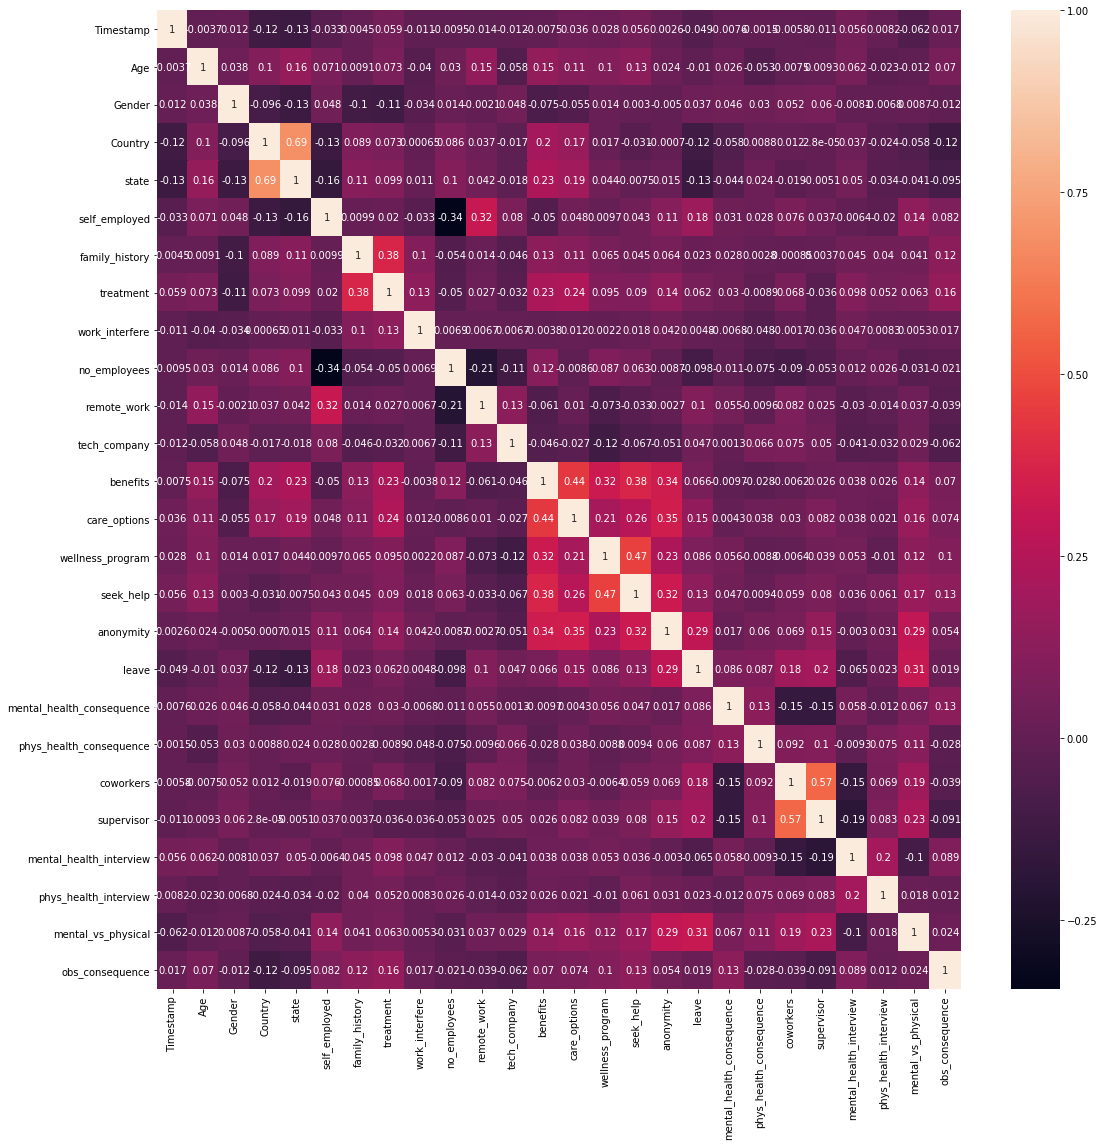

In [294]:
corr = data.corr()
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(corr, annot = True)

### Fuzzy C on Age and Timestamp

In [255]:
#Taking the columns into list for running the Fuzzy C
list_X = data['Age'].tolist()
list_Y = data['Timestamp'].tolist()
K = 2
centroid_x = []
centroid_y = []

#Assigning random values within the range of epochPeakCounter and stormPeak as initial cluster centres
for i in range (K):
    centroid_x.append(random.uniform(min(list_X), max(list_X)))
    centroid_y.append(random.uniform(min(list_Y), max(list_Y)))
iterationCounter = 30
random_cent = 1


In [256]:
#Defining the Eucledean Distance Function
def CalculateEucledeanDistance(x1,x2,y1,y2):
    dist_x = pow((x1 - x2),2)
    dist_y = pow((y1 - y2),2)
    dist_xy = dist_x + dist_y
    clusterDistance = np.sqrt(dist_xy)
    return clusterDistance

In [257]:
#Fuzzy C Centroid update function: Sum of ((Weight of datapoints)^2 * data point)/Sum of ((Weight of datapoints)^2
def UpdateCentroids(Matrix):
    centroid_x = []
    centroid_y = []
    nCentroidX = 0
    ndenomX = 0
    for k in range(K):
        for i in range(len(list_X)):
            for j in range(k,len(list_X)): 
            #print("XA:",pow(Matrix[i][j],2))
                nCentroidX += pow(Matrix[i][j],2)* list_X[i]
                ndenomX += pow(Matrix[i][j],2)

                break
        if(i==len(list_X)-1):
            centroid_x.append(nCentroidX/ndenomX)
        nCentroidX = 0
        ndenomX = 0
    nCentroidY = 0
    ndenomY = 0

    for k in range(K):
        for i in range(len(list_Y)):
        #j=0
            for j in range(k,len(list_Y)):
                nCentroidY += pow(Matrix[i][j],2)* list_Y[i]
                ndenomY += pow(Matrix[i][j],2)
                break
            if(i==len(list_Y)-1):
                centroid_y.append(nCentroidY/ndenomY)

#print(centroid_x)
#print(centroid_y)
    UpdatedWeights = updateWeights(list_X,list_Y,centroid_x,centroid_y)
#print(UpdatedWeights)

In [258]:
#Updating the weights of the data points
def updateWeights(list_X,list_Y,centroid_x,centroid_y):
    X = 0
    w, h = len(list_X), len(list_Y)
    DistanceMatrix = [[0 for x in range(w)] for y in range(h)]
    for i in range(len(list_X)):
        for j in range(len(centroid_x)):
            centroid_PointDist = CalculateEucledeanDistance(list_X[i],centroid_x[j],list_Y[i],centroid_y[j])
            DistanceMatrix[i][j] = centroid_PointDist
    #print(DistanceMatrix)


    w, h = len(centroid_x), len(list_X)
    Matrix = [[0 for x in range(w)] for y in range(h)]
    for i in range(len(centroid_x)):
    #nb = []
        for j in range(len(list_X)):
            if(i!=j):
                X = 1 + (pow(DistanceMatrix[j][i-1],2)/pow(DistanceMatrix[j][i],2))
                X = 1/X
            
            Matrix[j][i-1] = round(X,2)
            Matrix[j][i] = round(1-X,2)
    #nb.append(weights)   
    return(Matrix)

In [259]:
#Running the Fuzzy C 20 times and calculating distance between centroids
iteration_counter = 20
while(iteration_counter > 0):
    Matrix = updateWeights(list_X,list_Y,centroid_x,centroid_y)
    UpdateCentroids(Matrix)
    iteration_counter-=1
for i in range(len(centroid_x)):
    for j in range(len(centroid_x)):
        if(i!=j):
            distofclusters = CalculateEucledeanDistance(centroid_x[i], centroid_x[j], centroid_y[i], centroid_y[j])

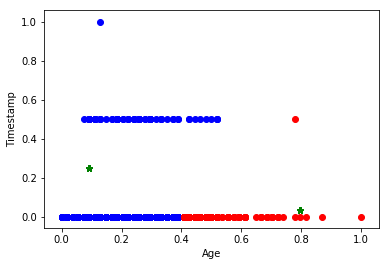

In [260]:
#Hardening the cluster assignment
b = [np.argmax(p) for p in Matrix]

cluster_colors = ['Red','Blue']
plt.xlabel('Age')
plt.ylabel('Timestamp')

#Scatter Plotting after hardening
for j in range(len(b)):
        for k in range(len(centroid_x)):
            if(b[j]== k):
                plt.scatter(list_X[j], list_Y[j], color = cluster_colors[k])
            
            plt.scatter(centroid_x[k], centroid_y[k], color = 'Green', marker ="*")

### KNN Implementation

In [302]:
X = data.drop(columns=['treatment'])
y = data['treatment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [319]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

y_predicted = knn.predict(X_test)
accuracy = '{:.0%}'.format(accuracy_score(y_test, y_predicted))

print(f'K nearest neighbors model accuracy: {accuracy}')

precision = '{:.0%}'.format(precision_score(y_test, y_predicted))

print(f'K nearest neighbors model precision: {precision}')

recall = '{:.0%}'.format(recall_score(y_test, y_predicted))

print(f'K nearest neighbors model recall: {recall}')

K nearest neighbors model accuracy: 56%
K nearest neighbors model precision: 63%
K nearest neighbors model recall: 39%


Minimum error:- 0.3134920634920635 at K = 25


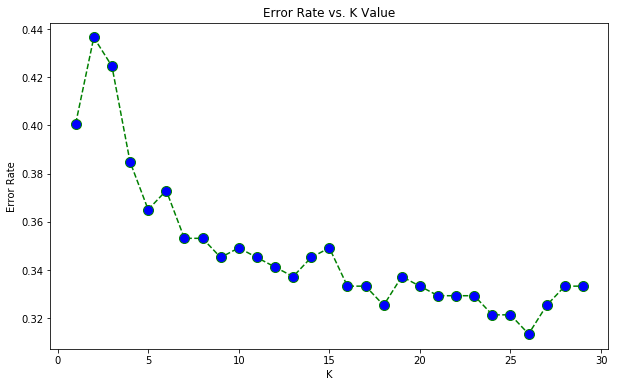

In [304]:
error_rate = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='green', linestyle='dashed', 
         marker='o',markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [305]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train,y_train)

y_predicted = knn.predict(X_test)
accuracy = '{:.0%}'.format(accuracy_score(y_test, y_predicted))

print(f'K nearest neighbors model accuracy: {accuracy}')

K nearest neighbors model accuracy: 68%


[[89 32]
 [44 87]]
K nearest neighbors model precision: 70%
K nearest neighbors model recall: 67%


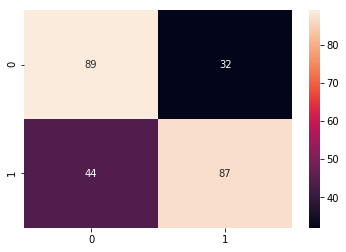

In [317]:
import seaborn as sns
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True)

precision = '{:.0%}'.format(precision_score(y_test, y_predicted))

print(f'K nearest neighbors model precision: {precision}')

recall = '{:.0%}'.format(recall_score(y_test, y_predicted))

print(f'K nearest neighbors model recall: {recall}')

### Naive Bayes Implementation

Accuracy: 0.6984126984126984

Confusion Matrix:  [[89 32]
 [44 87]]
NV model precision: 70%
NV model recall: 67%


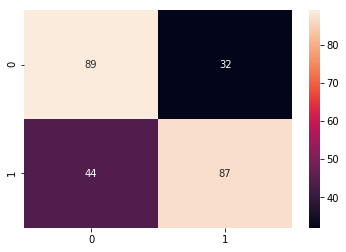

In [318]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import recall_score

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix: ",cf_matrix)

sns.heatmap(cf_matrix, annot=True)

precision = '{:.0%}'.format(precision_score(y_test, y_predicted))

print(f'NV model precision: {precision}')

recall = '{:.0%}'.format(recall_score(y_test, y_predicted))

print(f'NV model recall: {recall}')

### SVM Implementation with K-Fold cross validation and PCA for dimension reduction

Accuracy without Cross Validation:  0.6899038461538461
Accuracy with Cross Validation 0.7092929867830267
Preserved Variance: 0.39013941022034115


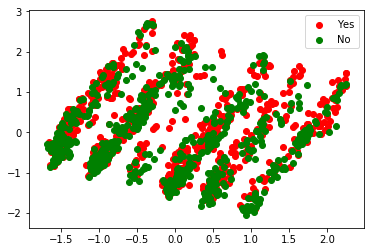

In [322]:
import pandas as pd
from sklearn import model_selection
from sklearn import svm
from sklearn.decomposition import PCA
from array import array

X = data.drop(columns=['treatment']).values

y = data.treatment


y.replace(to_replace=0, value='No',inplace=True)
y.replace(to_replace=1, value='Yes',inplace=True)

y = y.values

X_train, X_test, Y_train, Y_test = model_selection.train_test_split (X, y, test_size=0.33, random_state=0)

clf_ob = svm.SVC(kernel='rbf', C=1).fit(X_train, Y_train)

print("Accuracy without Cross Validation: ",clf_ob.score(X_test, Y_test))

scores_res = model_selection.cross_val_score(clf_ob, X, y, cv=5)

# And the mean accuracy of all 5 folds.
print("Accuracy with Cross Validation", scores_res.mean())

#Dimensionality Reduction using PCA (Principal Component Analysis) Here n_components = 2 means, transform into a 2-Dimensional dataset.

pca = PCA(n_components=2, whiten=True).fit(X)
X_pca = pca.transform(X)

print('Preserved Variance:', sum(pca.explained_variance_ratio_))

# Print scatter plot to view classification of the simplified dataset
colors = ['red', 'green']
target_names = ['Yes', 'No']

plt.figure()

target_list = (y).flatten()
for t_name, c in zip(target_names, colors):

    plt.scatter(X_pca[target_list == t_name, 0], X_pca[target_list ==t_name, 1], c=c, label=t_name)

plt.legend()
plt.show()

### Decision tree default

In [342]:
X = data[['family_history','care_options','benefits','seek_help']]

y = data.treatment

X_train, X_test, Y_train, Y_test = model_selection.train_test_split (X, y, test_size=0.2, random_state=0)

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4880952380952381


### Decision tree with entropy information gain and changed depth of tree

Accuracy: 0.49603174603174605


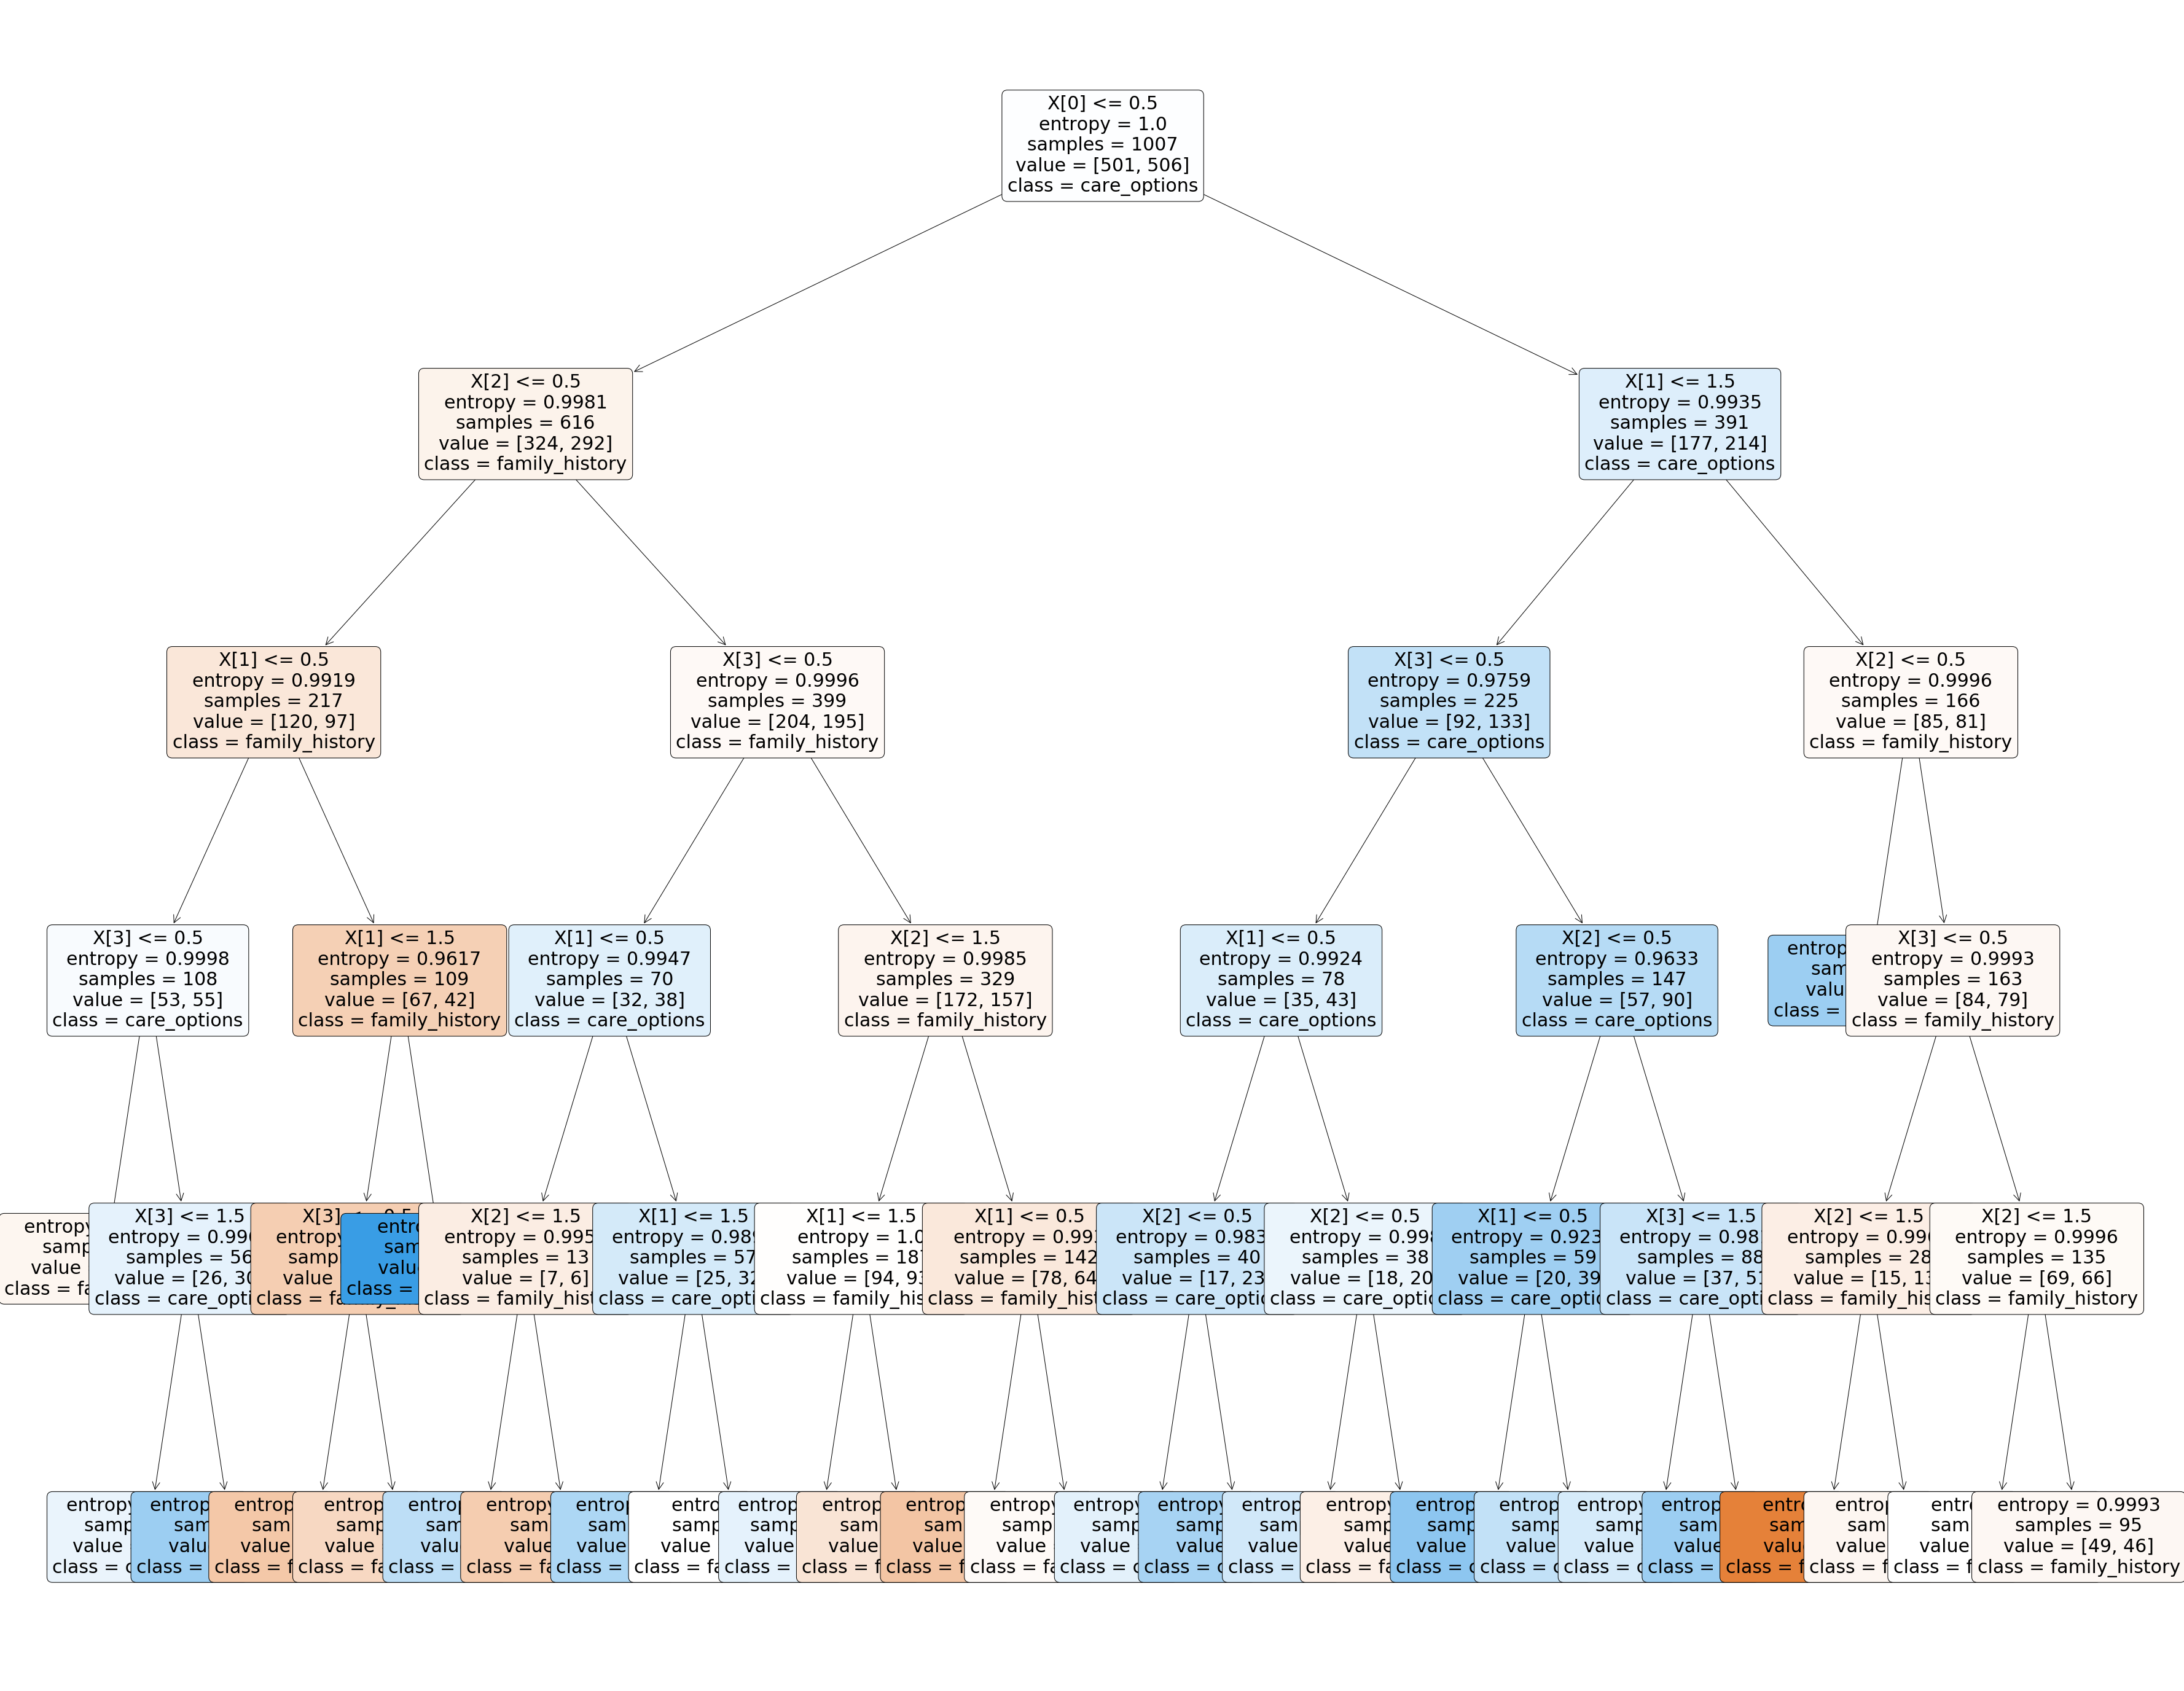

In [341]:
from sklearn import tree
from sklearn.tree import plot_tree
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=5)
#clf = tree.DecisionTreeClassifier()
clf = dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)
feature_cols = ['family_history', 'care_options', 'benefits', 'seek_help']
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
plt.figure(figsize=(60,50)) 
dec_tree = plot_tree(decision_tree=dtree, class_names = feature_cols , filled = True , precision = 4, rounded = True, fontsize=30)

plt.show()


Confusion Matrix:  [[58 63]
 [66 65]]
NV model precision: 63%
NV model recall: 39%


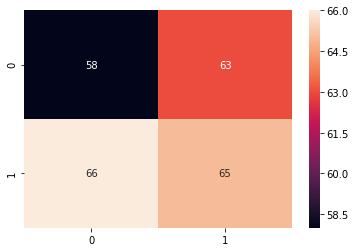

In [343]:
cf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix: ",cf_matrix)

sns.heatmap(cf_matrix, annot=True)

precision = '{:.0%}'.format(precision_score(y_test, y_predicted))

print(f'NV model precision: {precision}')

recall = '{:.0%}'.format(recall_score(y_test, y_predicted))

print(f'NV model recall: {recall}')

### Decision Tree Feature Importance

Feature: 0, Score: 0.12410
Feature: 1, Score: 0.40513
Feature: 2, Score: 0.18279
Feature: 3, Score: 0.28797


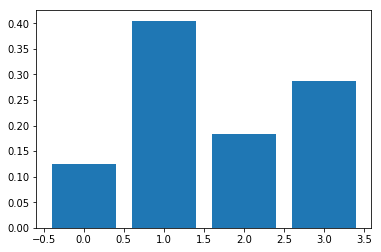

In [347]:
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

model = DecisionTreeRegressor()
# fit the model
model.fit(X_train,y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Random Forest implementation

Accuracy: 0.5

Confusion Matrix:  [[58 63]
 [63 68]]
RF model precision: 63%
RF model recall: 39%


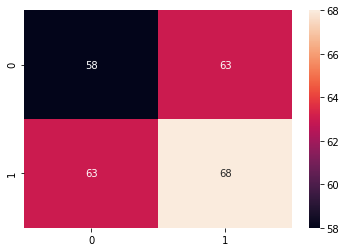

In [365]:
from sklearn.ensemble import RandomForestClassifier

X = data[['family_history','care_options','benefits','seek_help']]

y = data.treatment

X_train, X_test, Y_train, Y_test = model_selection.train_test_split (X, y, test_size=0.2, random_state=0)

model = RandomForestClassifier(criterion="entropy", max_depth=5)

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix: ",cf_matrix)

sns.heatmap(cf_matrix, annot=True)

precision = '{:.0%}'.format(precision_score(y_test, y_predicted))

print(f'RF model precision: {precision}')

recall = '{:.0%}'.format(recall_score(y_test, y_predicted))

print(f'RF model recall: {recall}')

### Random forest feature importance

Feature: 0, Score: 0.17964
Feature: 1, Score: 0.26350
Feature: 2, Score: 0.30576
Feature: 3, Score: 0.25110


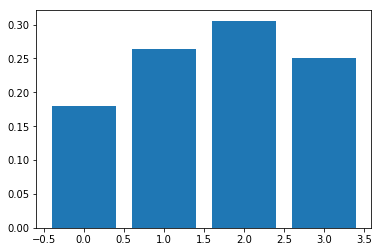

In [366]:
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Logistic Regression

Last 10 cost values: 
0.28159576236733497
0.281598681885032
0.28160160704858567
0.2816045378396554
0.2816074742399485
0.2816104162312201
0.2816133637952728
0.28161631691395683
0.2816192755691696
0.2816222397428558
0.281625209417007
Accuracy: 0.656084656084656

Confusion Matrix:  [[160  28]
 [102  88]]
LR model precision: 76%
LR model recall: 46%


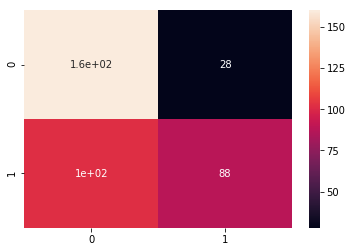

In [378]:
from math import e
X = data[['family_history','care_options','benefits','seek_help']]

y = data.treatment

y.replace(to_replace='No', value=0,inplace=True)
y.replace(to_replace='Yes', value=1,inplace=True)

X_train, X_test, Y_train, Y_test = model_selection.train_test_split (X, y, test_size=0.3, random_state=0)

def calc_HypothesisFunction(z):    
    hTheta = 1 / (1 + pow(e,-z))
    return hTheta

#Initializing Logistic Regression parameters. For the straight line equation y = mx + b, 
#assigning m and  b as 0 respectively for initial calculation.
intercept = 0

slope = np.zeros(X_train.shape[1], dtype=int)

#print('Slope: ', slope)
learning_rate = 0.02
no_Iterations = 1

#Running the gradient descent 1500 times in order to reduce cost function.
# The gradient descent would finally provide m and b values for y_prediction
size = len(X_train)

lambda_opt = np.ones(len(X_train), dtype=int)
lambda_opt = lambda_opt/size

TotalCost = []
Iterations = []
LastlevelCosts = []
iterationC = 1000
while(no_Iterations != iterationC): 
    no_Iterations+=1
    hTheta = np.dot(X_train , slope) + intercept
    hTheta = calc_HypothesisFunction(hTheta)
    thetaYSum = np.sum(Y_train * np.log(hTheta))
    thetaHSum = (1 - Y_train) * np.log(1-hTheta)
    #changing Cost function
    costChanged = pow(hTheta - Y_train,2)
    costChanged = np.sum(costChanged)
    totalCost = (-1/2 * size * costChanged)
    totalCost = (-1/size * thetaYSum) + thetaHSum
    #TotalCost.append(totalCost[0])
    XTranspose = X_train.transpose()
    derivateCommon = hTheta - Y_train
    derivateslope = 1/size * np.dot(XTranspose, derivateCommon)
    derivateintercept = 1/size * (np.sum(derivateCommon))
    slope = slope - learning_rate * derivateslope

    intercept = intercept - learning_rate * derivateintercept
    #Iterations.append(no_Iterations)

#Checking the last 5 values of cost function, if they dont change then number of iterations is correctly chosen
    if(no_Iterations > (iterationC-11) and no_Iterations <= iterationC):
         LastlevelCosts.append(totalCost)

print('Last 10 cost values: ')
for i in range(len(LastlevelCosts)):
        print( LastlevelCosts[i][0])

# #Predicting y = 1/1+e^(-z) where z = mx + b, calcualting z through updated values of m and b by gradient descent.

output_values = np.dot(X_test, slope) + intercept
y_predicted = np.array(calc_HypothesisFunction(output_values))




#Taking 0.5 as threshold, making y_predicted array as 0 and 1 based on values greater or less than 0.5
for i in range(len(y_predicted)):
    if(y_predicted[i] >= 0.6):
        y_predicted[i] = 1
    else:
        y_predicted[i] = 0

print("Accuracy:",metrics.accuracy_score(Y_test, y_predicted))

cf_matrix = confusion_matrix(Y_test, y_predicted)
print("\nConfusion Matrix: ",cf_matrix)

sns.heatmap(cf_matrix, annot=True)

precision = '{:.0%}'.format(precision_score(Y_test, y_predicted))

print(f'LR model precision: {precision}')

recall = '{:.0%}'.format(recall_score(Y_test, y_predicted))

print(f'LR model recall: {recall}')

### Autoencoder

Train on 843 samples, validate on 416 samples
Epoch 1/200
 - 2s - loss: 0.6533 - val_loss: 0.2369
Epoch 2/200
 - 0s - loss: 0.1903 - val_loss: 0.1488
Epoch 3/200
 - 0s - loss: 0.1189 - val_loss: 0.1152
Epoch 4/200
 - 0s - loss: 0.1001 - val_loss: 0.0961
Epoch 5/200
 - 0s - loss: 0.0897 - val_loss: 0.0827
Epoch 6/200
 - 0s - loss: 0.0823 - val_loss: 0.0739
Epoch 7/200
 - 0s - loss: 0.0768 - val_loss: 0.0689
Epoch 8/200
 - 0s - loss: 0.0733 - val_loss: 0.0639
Epoch 9/200
 - 0s - loss: 0.0706 - val_loss: 0.0600
Epoch 10/200
 - 0s - loss: 0.0670 - val_loss: 0.0571
Epoch 11/200
 - 0s - loss: 0.0639 - val_loss: 0.0548
Epoch 12/200
 - 0s - loss: 0.0623 - val_loss: 0.0524
Epoch 13/200
 - 0s - loss: 0.0602 - val_loss: 0.0505
Epoch 14/200
 - 0s - loss: 0.0589 - val_loss: 0.0482
Epoch 15/200
 - 0s - loss: 0.0578 - val_loss: 0.0471
Epoch 16/200
 - 0s - loss: 0.0545 - val_loss: 0.0454
Epoch 17/200
 - 0s - loss: 0.0548 - val_loss: 0.0437
Epoch 18/200
 - 0s - loss: 0.0525 - val_loss: 0.0426
Epoch 19/

Epoch 154/200
 - 0s - loss: 0.0246 - val_loss: 0.0132
Epoch 155/200
 - 0s - loss: 0.0240 - val_loss: 0.0130
Epoch 156/200
 - 0s - loss: 0.0232 - val_loss: 0.0124
Epoch 157/200
 - 0s - loss: 0.0235 - val_loss: 0.0125
Epoch 158/200
 - 0s - loss: 0.0233 - val_loss: 0.0123
Epoch 159/200
 - 0s - loss: 0.0232 - val_loss: 0.0125
Epoch 160/200
 - 0s - loss: 0.0240 - val_loss: 0.0123
Epoch 161/200
 - 0s - loss: 0.0234 - val_loss: 0.0128
Epoch 162/200
 - 0s - loss: 0.0239 - val_loss: 0.0122
Epoch 163/200
 - 0s - loss: 0.0234 - val_loss: 0.0121
Epoch 164/200
 - 0s - loss: 0.0235 - val_loss: 0.0119
Epoch 165/200
 - 0s - loss: 0.0228 - val_loss: 0.0117
Epoch 166/200
 - 0s - loss: 0.0229 - val_loss: 0.0118
Epoch 167/200
 - 0s - loss: 0.0226 - val_loss: 0.0114
Epoch 168/200
 - 0s - loss: 0.0226 - val_loss: 0.0113
Epoch 169/200
 - 0s - loss: 0.0226 - val_loss: 0.0115
Epoch 170/200
 - 0s - loss: 0.0225 - val_loss: 0.0117
Epoch 171/200
 - 0s - loss: 0.0229 - val_loss: 0.0111
Epoch 172/200
 - 0s - loss: 

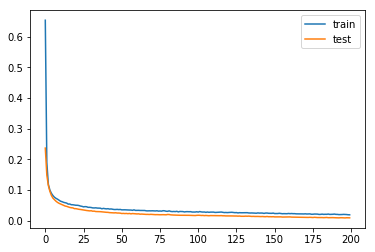

In [379]:
# train autoencoder for classification with no compression in the bottleneck layer
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
import pandas as pd

X = data.drop(columns=['treatment'])
y = data['treatment']
#data = pd.read_csv('survey.csv')
# define dataset
#X = data.drop(columns=['treatment'])
#y = data['treatment']
#X, y = make_classification(n_samples=1000, n_features=100, n_informative=10, n_redundant=90, random_state=1)
# number of input columns
n_inputs = X.shape[1]
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = n_inputs
bottleneck = Dense(n_bottleneck)(e)
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')
# plot the autoencoder
plot_model(model, 'autoencoder_no_compress.png', show_shapes=True)
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=200, batch_size=16, verbose=2, validation_data=(X_test,X_test))
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_no_compress.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder.h5')

AutoEncoder Accuracy:  71.39

Confusion Matrix:  [[137  62]
 [ 57 160]]
LR model precision: 72%
LR model recall: 74%


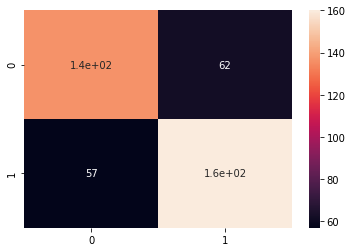

In [383]:
# evaluate logistic regression on encoded input
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
# define dataset
X = data.drop(columns=['treatment'])
y = data['treatment']
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# load the model from file
encoder = load_model('encoder.h5')
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)
# define the model
model = LogisticRegression()
# fit the model on the training set
model.fit(X_train_encode, y_train)
# make predictions on the test set
yhat = model.predict(X_test_encode)
# calculate classification accuracy
acc = accuracy_score(y_test, yhat)
print("AutoEncoder Accuracy: ", round ((acc*100),2))

cf_matrix = confusion_matrix(y_test, yhat)
print("\nConfusion Matrix: ",cf_matrix)

sns.heatmap(cf_matrix, annot=True)

precision = '{:.0%}'.format(precision_score(y_test, yhat))

print(f'LR model precision: {precision}')

recall = '{:.0%}'.format(recall_score(y_test, yhat))

print(f'LR model recall: {recall}')